In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\aryan\OneDrive\Desktop\Capstone Project\Data Preprocessing New\uncleaned_gurgaon_properties_v2.csv')

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [4]:
df.sample(1)

,Property Name,Sector,Price,Built Up Area,Bedroom,Bathroom,Balcony,Others,Pooja Room,Servant Room,Store Room,Study Room,Floor Num,Total Floor,Facing_North,Facing_North-East,Facing_North-West,Facing_South,Facing_South-East,Facing_South-West,Facing_Unknown,Facing_West,Property Age,details,Rating,URL,Overlooking_Club,Overlooking_Lake facing,Overlooking_Main Road,Overlooking_Others,Overlooking_Park,Overlooking_Pool,NearbyPlace_Business,NearbyPlace_Education,NearbyPlace_Financial,NearbyPlace_Healthcare,NearbyPlace_Leisure,NearbyPlace_Religious,NearbyPlace_Residentail,NearbyPlace_Shopping,NearbyPlace_Transport
6394,Pivotal Devaan,Sector 84,0.58,539,2,2,1,0,0,0,0,0,7,14,0,1,0,0,0,0,0,0,2,"Transaction Type: :, Resale | Property Ownership: :, Freehold | Flooring: :, Concrete | Furnishing: :, Semifurnished | Width of facing road: :, 78.7 Feet | Gated Community: :, Yes | Corner Property: :, Yes | Parking: :, 1 Covered | WheelChair Friendly: :, Yes | Pet Friendly: :, Yes | Water Source: :, 24*7 Water | Power Backup: :, Partial | Property Code: :, K80064255",NaN,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-pivotal-devaan-sector-84-gurgaon-583-sq-ft-r1-spid-K80064255,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [5]:
x = df['details'].sample(1)

In [6]:
x.iloc[0]

"{'Property Ownership': ':, Freehold', 'Flooring': ':, Marble', 'Furnishing': ':, Semifurnished', 'Gated Community': ':, Yes', 'Corner Property': ':, Yes', 'Parking': ':, 2 Covered', 'WheelChair Friendly': ':, Yes', 'Pet Friendly': ':, Yes', 'Water Source': ':, Municipal corporation,Borewell/Tank,24*7 Water', 'Power Backup': ':, Full', 'Property Code': ':, P82343642'}"

In [7]:
df['details'].value_counts()

details
{'Transaction Type': ':, Resale', 'Property Ownership': ':, Freehold', 'Flooring': ':, Wood', 'Furnishing': ':, Semifurnished', 'Width of facing road': ':, 52.5 Feet', 'Gated Community': ':, Yes', 'Corner Property': ':, Yes', 'Parking': ':, 2 Covered, 3 Open', 'WheelChair Friendly': ':, Yes', 'Pet Friendly': ':, Yes', 'Water Source': ':, 24*7 Water', 'Power Backup': ':, Full', 'Property Code': ':, S83638806'}    2
{'Transaction Type': ':, Resale', 'Property Ownership': ':, Freehold', 'Flooring': ':, Wood', 'Furnishing': ':, Semifurnished', 'Width of facing road': ':, 52.5 Feet', 'Gated Community': ':, Yes', 'Corner Property': ':, Yes', 'Parking': ':, 2 Covered, 3 Open', 'WheelChair Friendly': ':, Yes', 'Pet Friendly': ':, Yes', 'Water Source': ':, 24*7 Water', 'Power Backup': ':, Full', 'Property Code': ':, E83637500'}    2
{'Property Ownership': ':, Freehold', 'Flooring': ':, Marble', 'Furnishing': ':, Semifurnished', 'Width of facing road': ':, 25.0 Feet', 'Gated Community': 

In [8]:
len(df.columns)

41

In [9]:
import ast # Needed to safely evaluate the dictionary-like string

def parse_any_detail_format(detail_data):
    """
    Handles both pipe-separated strings AND dictionary-like strings.
    """
    features_to_keep = {
        'Furnishing', 
        'Gated Community', 
        'Parking', 
        'Power Backup', 
        'Property Ownership'
    }
    
    final_dict = {}
    
    # Handle missing values first
    if not isinstance(detail_data, str):
        return {}

    cleaned_str = detail_data.strip()
    
    # --- LOGIC FOR DICTIONARY-LIKE STRING ---
    if cleaned_str.startswith('{'):
        try:
            # Safely convert the string to a dictionary
            temp_dict = ast.literal_eval(cleaned_str)
            for key, value in temp_dict.items():
                if key in features_to_keep:
                    cleaned_value = str(value).replace(':,', '').strip()
                    final_dict[key] = cleaned_value
            return final_dict
        except Exception:
            return {} # Return empty if conversion fails

    # --- LOGIC FOR PIPE-SEPARATED STRING ---
    else:
        pairs = cleaned_str.split('|')
        for pair in pairs:
            parts = pair.split(':', 1)
            if len(parts) == 2:
                key = parts[0].strip()
                if key in features_to_keep:
                    value = parts[1].replace(':,', '').strip()
                    final_dict[key] = value
        return final_dict

In [10]:
details_series = df['details'].apply(parse_any_detail_format)
extracted_details_df = pd.json_normalize(details_series)
df = pd.concat([df, extracted_details_df], axis=1)

In [11]:
df[['Property Ownership', 'Furnishing', 'Gated Community', 'Power Backup', 'Parking']].isnull().sum()

Property Ownership     20
Furnishing            310
Gated Community       916
Power Backup            0
Parking               621
dtype: int64

In [12]:
df.sample(1)

,Property Name,Sector,Price,Built Up Area,Bedroom,Bathroom,Balcony,Others,Pooja Room,Servant Room,Store Room,Study Room,Floor Num,Total Floor,Facing_North,Facing_North-East,Facing_North-West,Facing_South,Facing_South-East,Facing_South-West,Facing_Unknown,Facing_West,Property Age,details,Rating,URL,Overlooking_Club,Overlooking_Lake facing,Overlooking_Main Road,Overlooking_Others,Overlooking_Park,Overlooking_Pool,NearbyPlace_Business,NearbyPlace_Education,NearbyPlace_Financial,NearbyPlace_Healthcare,NearbyPlace_Leisure,NearbyPlace_Religious,NearbyPlace_Residentail,NearbyPlace_Shopping,NearbyPlace_Transport,Property Ownership,Furnishing,Gated Community,Power Backup,Parking
7301,Suncity Avenue 76,Sector 76,0.96,996,2,2,1,1,0,0,0,0,8,14,0,0,1,0,0,0,0,0,2,"Transaction Type: :, Resale | Property Ownership: :, Freehold | Flooring: :, Marble | Furnishing: :, Furnished | Width of facing road: :, 78.7 Feet | Gated Community: :, Yes | Corner Property: :, Yes | Parking: :, 1 Open | WheelChair Friendly: :, Yes | Pet Friendly: :, Yes | Water Source: :, Municipal corporation,Borewell/Tank,24*7 Water | Power Backup: :, Partial | Property Code: :, R82778730",3.8,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-suncity-avenue-76-sector-76-gurgaon-1075-sq-ft-spid-R82778730,0,1,1,1,1,0,0,1,0,1,0,0,0,1,1,Freehold,Furnished,Yes,Partial,1 Open


In [13]:
df['Power Backup'].value_counts()

Power Backup
Full       7242
None       1420
Partial     974
Name: count, dtype: int64

In [14]:
df['Parking'].value_counts()

Parking
1 Covered             2845
1 Covered, 1 Open     2119
2 Covered             1665
2 Covered, 1 Open      863
1 Open                 802
2 Covered, 2 Open      278
2 Open                 143
3 Covered, 1 Open       78
3 Covered               61
1 Covered, 2 Open       60
3 Covered, 2 Open       20
2 Covered, 3 Open       11
4 Covered, 2 Open       10
Covered, 1 Open          8
3 Open                   6
4 Covered                5
3 Covered, 3 Open        5
1 Covered, Open          5
1 Covered, 4 Open        4
3 Covered, 4 Open        3
4 Covered, 4 Open        3
2 Covered, 0 Open        3
2 Covered, Open          2
0 Covered, 1 Open        2
4 Covered, 1 Open        1
1 Covered, 6 Open        1
16 Covered, 8 Open       1
2 Covered, 7 Open        1
1 Covered, 0 Open        1
Covered, Open            1
0 Covered, 0 Open        1
5 Open                   1
2 Covered, 4 Open        1
4 Open                   1
6 Covered, 3 Open        1
5 Covered                1
1 Covered, 3 Open   

In [15]:
df['Gated Community'].value_counts()

Gated Community
Yes    8720
Name: count, dtype: int64

In [16]:
df['Furnishing'].value_counts()

Furnishing
Semifurnished    7128
Unfurnished      1586
Furnished         612
Name: count, dtype: int64

In [17]:
df['Property Ownership'].value_counts()

Property Ownership
Freehold                9453
Leasehold                 84
Co-operative Society      46
Power of Attorney         33
Name: count, dtype: int64

In [18]:
df.sample(1)

,Property Name,Sector,Price,Built Up Area,Bedroom,Bathroom,Balcony,Others,Pooja Room,Servant Room,Store Room,Study Room,Floor Num,Total Floor,Facing_North,Facing_North-East,Facing_North-West,Facing_South,Facing_South-East,Facing_South-West,Facing_Unknown,Facing_West,Property Age,details,Rating,URL,Overlooking_Club,Overlooking_Lake facing,Overlooking_Main Road,Overlooking_Others,Overlooking_Park,Overlooking_Pool,NearbyPlace_Business,NearbyPlace_Education,NearbyPlace_Financial,NearbyPlace_Healthcare,NearbyPlace_Leisure,NearbyPlace_Religious,NearbyPlace_Residentail,NearbyPlace_Shopping,NearbyPlace_Transport,Property Ownership,Furnishing,Gated Community,Power Backup,Parking
3950,Pareena Express Heights,Sector 99,1.82,1727,3,3,2,0,0,0,0,0,7,14,1,0,0,0,0,0,0,0,2,"Transaction Type: :, Resale | Property Ownership: :, Freehold | Flooring: :, Granite | Furnishing: :, Semifurnished | Width of facing road: :, 492.1 Feet | Gated Community: :, Yes | Corner Property: :, Yes | Parking: :, 1 Covered, 1 Open | WheelChair Friendly: :, Yes | Pet Friendly: :, Yes | Water Source: :, Municipal corporation,Borewell/Tank,24*7 Water | Power Backup: :, Partial | Property Code: :, Q82363484",4.1,https://www.99acres.com/3-bhk-bedroom-apartment-flat-for-sale-in-pareena-express-heights-sector-99-gurgaon-1865-sq-ft-spid-Q82363484,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,Freehold,Semifurnished,Yes,Partial,"1 Covered, 1 Open"


In [19]:
avg_price_by_parking = df.groupby('Parking')['Price'].mean().sort_values()

Text(0, 0.5, 'Parking Type')

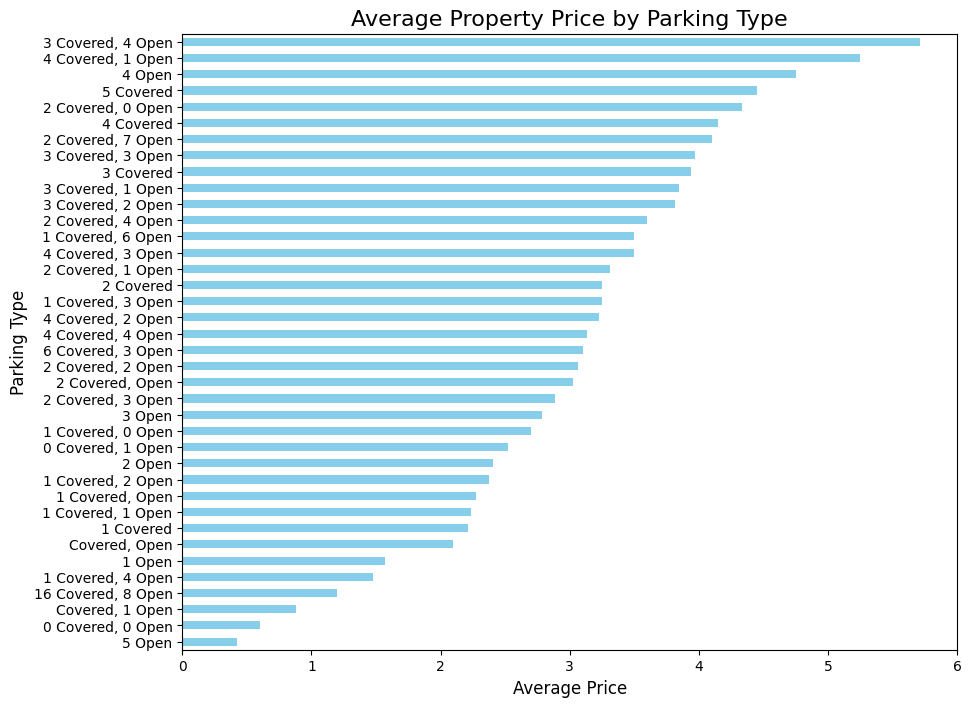

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10, 8))
avg_price_by_parking.plot(kind= 'barh', color= 'skyblue')
plt.title('Average Property Price by Parking Type', fontsize=16)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Parking Type', fontsize=12)

In [21]:
avg_price_by_parking.reset_index()

,Parking,Price
0,5 Open,0.420000
1,"0 Covered, 0 Open",0.600000
2,"Covered, 1 Open",0.883125
3,"16 Covered, 8 Open",1.200000
4,"1 Covered, 4 Open",1.480000
5,1 Open,1.566566
6,"Covered, Open",2.100000
7,1 Covered,2.212727
8,"1 Covered, 1 Open",2.239670
9,"1 Covered, Open",2.278000


2.21
2.23
3.25

In [22]:
df.loc[(df['Price'] <= 2.1) & (df['Parking'].isnull()), 'Parking'] = '1 Covered'
df.loc[(df['Price'] > 2.1) & (df['Price'] <= 2.4) & (df['Parking'].isnull()), 'Parking'] = '1 Covered, 1 Open'
df.loc[(df['Price'] > 2.4) & (df['Price'] <= 2.7) & (df['Parking'].isnull()), 'Parking'] = '1 Covered'
df.loc[(df['Price'] > 2.7) & (df['Parking'].isnull()), 'Parking'] = '2 Covered'

In [23]:
df['Parking'].isnull().sum()

np.int64(0)

In [24]:
# df['Open Parking'] = df['Parking'].str.split('Open').str.get(0).str.split(',').str.get(1).str.strip()

In [25]:
# df['Covered Parking'] = df['Parking'].str.split('Covered').str.get(0).str.strip()

In [26]:
# df['Covered Parking'] = df['Covered Parking'].fillna(0)
# df['Open Parking'] = df['Open Parking'].fillna(0)

In [27]:
df['Covered_Parking'] = df['Parking'].str.extract(r'(\d+)\s*Covered').fillna(0).astype('int8')

In [28]:
df['Open_Parking'] = df['Parking'].str.extract(r'(\d+)\s*Open').fillna(0).astype('int8')

In [29]:
df['Open_Parking'].isnull().sum()

np.int64(0)

In [30]:
df['Covered_Parking'].isnull().sum()

np.int64(0)

In [31]:
df['Total Parking'] = df['Open_Parking'] + df['Covered_Parking']
df['Total Parking'] = df['Total Parking'].astype('int8')

In [32]:
df.sample(1)

,Property Name,Sector,Price,Built Up Area,Bedroom,Bathroom,Balcony,Others,Pooja Room,Servant Room,Store Room,Study Room,Floor Num,Total Floor,Facing_North,Facing_North-East,Facing_North-West,Facing_South,Facing_South-East,Facing_South-West,Facing_Unknown,Facing_West,Property Age,details,Rating,URL,Overlooking_Club,Overlooking_Lake facing,Overlooking_Main Road,Overlooking_Others,Overlooking_Park,Overlooking_Pool,NearbyPlace_Business,NearbyPlace_Education,NearbyPlace_Financial,NearbyPlace_Healthcare,NearbyPlace_Leisure,NearbyPlace_Religious,NearbyPlace_Residentail,NearbyPlace_Shopping,NearbyPlace_Transport,Property Ownership,Furnishing,Gated Community,Power Backup,Parking,Covered_Parking,Open_Parking,Total Parking
4833,Puri Diplomatic Greens,Sector 111,4.8,2731,4,5,3+,0,0,1,0,0,10,22,0,1,0,0,0,0,0,0,1,"Transaction Type: :, Resale | Property Ownership: :, Freehold | Flooring: :, Vitrified | Furnishing: :, Semifurnished | Width of facing road: :, 492.1 Feet | Gated Community: :, Yes | Corner Property: :, Yes | Parking: :, 1 Covered | Water Source: :, Municipal corporation | Power Backup: :, Full | Property Code: :, Z44648697",3.7,https://www.99acres.com/4-bhk-bedroom-apartment-flat-for-sale-in-puri-diplomatic-greens-sector-111-gurgaon-2950-sq-ft-r20-spid-Z44648697,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,Freehold,Semifurnished,Yes,Full,1 Covered,1,0,1


In [33]:
df.drop(columns= 'Parking', inplace= True)

In [34]:
df.isnull().sum()

Property Name                 0
Sector                        0
Price                         0
Built Up Area                 0
Bedroom                       0
Bathroom                      0
Balcony                       0
Others                        0
Pooja Room                    0
Servant Room                  0
Store Room                    0
Study Room                    0
Floor Num                     0
Total Floor                   0
Facing_North                  0
Facing_North-East             0
Facing_North-West             0
Facing_South                  0
Facing_South-East             0
Facing_South-West             0
Facing_Unknown                0
Facing_West                   0
Property Age                  0
details                       0
Rating                     3681
URL                           0
Overlooking_Club              0
Overlooking_Lake facing       0
Overlooking_Main Road         0
Overlooking_Others            0
Overlooking_Park              0
Overlook

<Axes: xlabel='Property Ownership'>

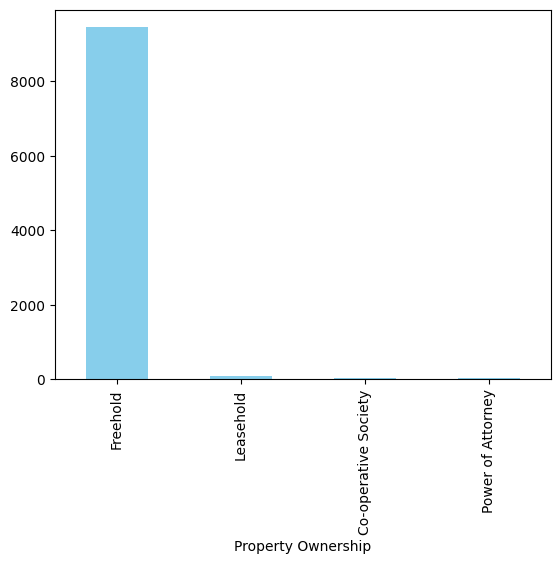

In [35]:
df['Property Ownership'].value_counts().plot(kind= 'bar', color= 'skyblue')

In [36]:
df['Property Ownership'] = df['Property Ownership'].fillna('Freehold')

<Axes: xlabel='Furnishing'>

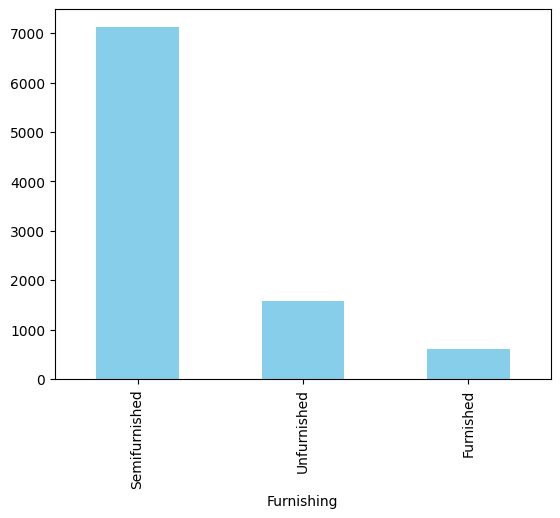

In [37]:
df['Furnishing'].value_counts().plot(kind= 'bar', color= 'skyblue')

In [38]:
df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_18144\39529471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)


In [39]:
df['Gated Community'].value_counts()

Gated Community
Yes    8720
Name: count, dtype: int64

In [40]:
df.drop(columns= 'Gated Community', inplace= True)

In [41]:
df.columns

Index(['Property Name', 'Sector', 'Price', 'Built Up Area', 'Bedroom',
       'Bathroom', 'Balcony', 'Others', 'Pooja Room', 'Servant Room',
       'Store Room', 'Study Room', 'Floor Num', 'Total Floor', 'Facing_North',
       'Facing_North-East', 'Facing_North-West', 'Facing_South',
       'Facing_South-East', 'Facing_South-West', 'Facing_Unknown',
       'Facing_West', 'Property Age', 'details', 'Rating', 'URL',
       'Overlooking_Club', 'Overlooking_Lake facing', 'Overlooking_Main Road',
       'Overlooking_Others', 'Overlooking_Park', 'Overlooking_Pool',
       'NearbyPlace_Business', 'NearbyPlace_Education',
       'NearbyPlace_Financial', 'NearbyPlace_Healthcare',
       'NearbyPlace_Leisure', 'NearbyPlace_Religious',
       'NearbyPlace_Residentail', 'NearbyPlace_Shopping',
       'NearbyPlace_Transport', 'Property Ownership', 'Furnishing',
       'Power Backup', 'Covered_Parking', 'Open_Parking', 'Total Parking'],
      dtype='object')

In [42]:
df.drop(columns= ['details'], inplace= True)

In [ ]:
# df.drop(columns= 'Property Name', inplace= True)

<Axes: xlabel='Rating'>

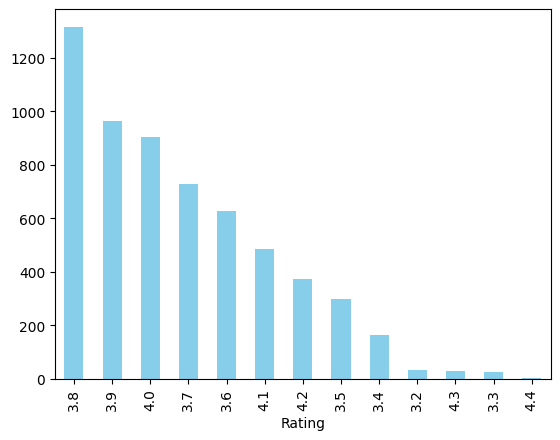

In [43]:
df['Rating'].value_counts().plot(kind= 'bar', color= 'skyblue')

**Rating**

In [44]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
columns_to_encode = ['Sector', 'Furnishing', 'Property Ownership', 'Power Backup']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [45]:
df_encoded.loc[df_encoded['Balcony'] == '3+', 'Balcony'] = '4'

In [49]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded.drop(columns= ['Property Name', 'URL'])), columns= df_encoded.drop(columns= ['Property Name', 'URL']).columns)

In [50]:
imputer = KNNImputer(n_neighbors= 5)
df_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_scaled), columns= df_scaled.columns)
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed_scaled), columns= df_imputed_scaled.columns, index= df.index)

In [51]:
df['Rating_imputed'] = df_imputed['Rating']

In [52]:
df[['Rating', 'Rating_imputed']].sample(5)

,Rating,Rating_imputed
7331,NaN,3.84
1638,NaN,3.80
1012,4.0,4.00
6980,4.1,4.10
6055,3.5,3.50


In [53]:
df.drop(columns= 'Rating', inplace= True)

In [54]:
df.rename(columns= {'Rating_imputed': 'Rating'}, inplace= True)

In [55]:
df.columns

Index(['Property Name', 'Sector', 'Price', 'Built Up Area', 'Bedroom',
       'Bathroom', 'Balcony', 'Others', 'Pooja Room', 'Servant Room',
       'Store Room', 'Study Room', 'Floor Num', 'Total Floor', 'Facing_North',
       'Facing_North-East', 'Facing_North-West', 'Facing_South',
       'Facing_South-East', 'Facing_South-West', 'Facing_Unknown',
       'Facing_West', 'Property Age', 'URL', 'Overlooking_Club',
       'Overlooking_Lake facing', 'Overlooking_Main Road',
       'Overlooking_Others', 'Overlooking_Park', 'Overlooking_Pool',
       'NearbyPlace_Business', 'NearbyPlace_Education',
       'NearbyPlace_Financial', 'NearbyPlace_Healthcare',
       'NearbyPlace_Leisure', 'NearbyPlace_Religious',
       'NearbyPlace_Residentail', 'NearbyPlace_Shopping',
       'NearbyPlace_Transport', 'Property Ownership', 'Furnishing',
       'Power Backup', 'Covered_Parking', 'Open_Parking', 'Total Parking',
       'Rating'],
      dtype='object')

In [56]:
df.isnull().sum()

Property Name              0
Sector                     0
Price                      0
Built Up Area              0
Bedroom                    0
Bathroom                   0
Balcony                    0
Others                     0
Pooja Room                 0
Servant Room               0
Store Room                 0
Study Room                 0
Floor Num                  0
Total Floor                0
Facing_North               0
Facing_North-East          0
Facing_North-West          0
Facing_South               0
Facing_South-East          0
Facing_South-West          0
Facing_Unknown             0
Facing_West                0
Property Age               0
URL                        0
Overlooking_Club           0
Overlooking_Lake facing    0
Overlooking_Main Road      0
Overlooking_Others         0
Overlooking_Park           0
Overlooking_Pool           0
NearbyPlace_Business       0
NearbyPlace_Education      0
NearbyPlace_Financial      0
NearbyPlace_Healthcare     0
NearbyPlace_Le

In [57]:
df.dtypes

Property Name               object
Sector                      object
Price                      float64
Built Up Area                int64
Bedroom                      int64
Bathroom                     int64
Balcony                     object
Others                       int64
Pooja Room                   int64
Servant Room                 int64
Store Room                   int64
Study Room                   int64
Floor Num                    int64
Total Floor                  int64
Facing_North                 int64
Facing_North-East            int64
Facing_North-West            int64
Facing_South                 int64
Facing_South-East            int64
Facing_South-West            int64
Facing_Unknown               int64
Facing_West                  int64
Property Age                 int64
URL                         object
Overlooking_Club             int64
Overlooking_Lake facing      int64
Overlooking_Main Road        int64
Overlooking_Others           int64
Overlooking_Park    

In [ ]:
# df['Bedroom'] = df['Bedroom'].astype('int8')
# df['Bathroom'] = df['Bathroom'].astype('int8')
# df['Others'] = df['Others'].astype('int8')
# df['Pooja Room'] = df['Pooja Room'].astype('int8')
# df['Servant Room'] = df['Servant Room'].astype('int8')
# df['Store Room'] = df['Store Room'].astype('int8')
# df['Study Room'] = df['Study Room'].astype('int8')
# df['Floor Num'] = df['Floor Num'].astype('int8')
# df['Total Floor'] = df['Total Floor'].astype('int8')
# df['Facing_North'] = df['Facing_North'].astype('int8')
# df['Facing_North-East'] = df['Facing_North-East'].astype('int8')
# df['Facing_North-West'] = df['Facing_North-West'].astype('int8')
# df['Facing_South'] = df['Facing_South'].astype('int8')
# df['Facing_South-East'] = df['Facing_South-East'].astype('int8')
# df['Facing_South-West'] = df['Facing_South-West'].astype('int8')
# df['Facing_Unknown'] = df['Facing_Unknown'].astype('int8')
# df['Facing_West'] = df['Facing_West'].astype('int8')
# df['Property Age'] = df['Property Age'].astype('int8')
# df['Overlooking_Club'] = df['Overlooking_Club'].astype('int8')
# df['Overlooking_Lake facing'] = df['Overlooking_Lake facing'].astype('int8')
# df['Overlooking_Main Road'] = df['Overlooking_Main Road'].astype('int8')
# df['Overlooking_Others'] = df['Overlooking_Others'].astype('int8')
# df['Overlooking_Park'] = df['Overlooking_Park'].astype('int8')
# df['Overlooking_Pool'] = df['Overlooking_Pool'].astype('int8')
# df['NearbyPlace_Business'] = df['NearbyPlace_Business'].astype('int8')
# df['NearbyPlace_Education'] = df['NearbyPlace_Education'].astype('int8')
# df['NearbyPlace_Financial'] = df['NearbyPlace_Financial'].astype('int8')
# df['NearbyPlace_Healthcare'] = df['NearbyPlace_Healthcare'].astype('int8')
# df['NearbyPlace_Leisure'] = df['NearbyPlace_Leisure'].astype('int8')
# df['NearbyPlace_Religious'] = df['NearbyPlace_Religious'].astype('int8')
# df['NearbyPlace_Residentail'] = df['NearbyPlace_Residentail'].astype('int8')
# df['NearbyPlace_Shopping'] = df['NearbyPlace_Shopping'].astype('int8')
# df['NearbyPlace_Transport'] = df['NearbyPlace_Transport'].astype('int8')
# df['Open_Parking'] = df['Open_Parking'].astype('int8')
# df['Covered_Parking'] = df['Covered_Parking'].astype('int8')
# df['Total Parking'] = df['Total Parking'].astype('int8')

In [57]:
df.dtypes

Sector                      object
Price                      float64
Built Up Area                int64
Bedroom                       int8
Bathroom                      int8
Balcony                     object
Others                        int8
Pooja Room                    int8
Servant Room                  int8
Store Room                    int8
Study Room                    int8
Floor Num                     int8
Total Floor                   int8
Facing_North                  int8
Facing_North-East             int8
Facing_North-West             int8
Facing_South                  int8
Facing_South-East             int8
Facing_South-West             int8
Facing_Unknown                int8
Facing_West                   int8
Property Age                  int8
Overlooking_Club              int8
Overlooking_Lake facing       int8
Overlooking_Main Road         int8
Overlooking_Others            int8
Overlooking_Park              int8
Overlooking_Pool              int8
NearbyPlace_Business

<Axes: xlabel='Balcony'>

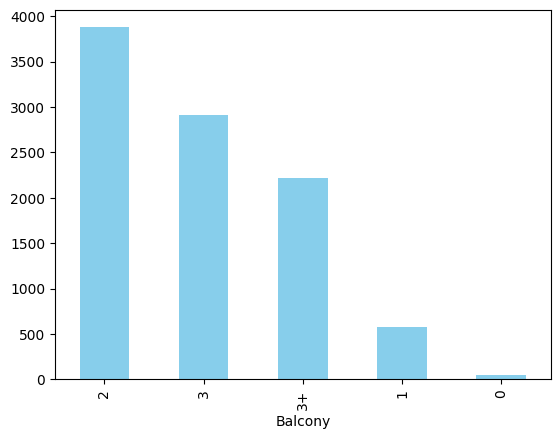

In [58]:
df['Balcony'].value_counts().plot(kind= 'bar', color= 'skyblue')

In [59]:
df.loc[df['Balcony'] == '3+', 'Balcony'] = 4

In [ ]:
# df['Balcony'] = df['Balcony'].astype('int8')

In [60]:
df['Property Ownership'].value_counts()

Property Ownership
Freehold                9473
Leasehold                 84
Co-operative Society      46
Power of Attorney         33
Name: count, dtype: int64

In [64]:
df['Property Ownership'].replace({'Freehold': 1, 'Leasehold': 0, 'Co-operative Society': 0, 'Power of Attorney': 0}, inplace= True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_9324\878152366.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Property Ownership'].replace({'Freehold': 1, 'Leasehold': 0, 'Co-operative Society': 0, 'Power of Attorney': 0}, inplace= True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_9324\878152366.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `p

In [ ]:
# df['Property Ownership'] = df['Property Ownership'].astype('int8')

In [66]:
df['Furnishing'].value_counts()

Furnishing
Semifurnished    7438
Unfurnished      1586
Furnished         612
Name: count, dtype: int64

In [ ]:
# df['Furnishing'].replace({'Furnished': 2, 'Semifurnished': 1, 'Unfurnished': 0}, inplace= True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_9324\991648248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Furnishing'].replace({'Furnished': 2, 'Semifurnished': 1, 'Unfurnished': 0}, inplace= True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_9324\991648248.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

In [ ]:
# df['Furnishing'] = df['Furnishing'].astype('int8')

In [69]:
df['Power Backup'].value_counts()

Power Backup
Full       7242
None       1420
Partial     974
Name: count, dtype: int64

In [ ]:
# df['Power Backup'].replace({'Full': 2, 'None': 0, 'Partial': 1}, inplace= True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_9324\3835295848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Power Backup'].replace({'Full': 2, 'None': 0, 'Partial': 1}, inplace= True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_9324\3835295848.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

In [ ]:
# df['Power Backup'] = df['Power Backup'].astype('int8')

In [64]:
df.to_csv(r'C:\Users\aryan\OneDrive\Desktop\Capstone Project\Datasets\data_recommendation_v1.csv')

In [92]:
df = pd.read_csv(r"C:\Users\aryan\OneDrive\Desktop\Capstone Project\Data Preprocessing New\data_recommendation_v1.csv")

In [93]:
pd.set_option('display.max_columns', None)

In [94]:
df.drop(columns= 'Unnamed: 0', inplace= True)

In [95]:
df['Property Ownership'].value_counts()

Property Ownership
Freehold                9473
Leasehold                 84
Co-operative Society      46
Power of Attorney         33
Name: count, dtype: int64

In [96]:
df.drop(columns= 'Property Ownership', inplace= True)

In [97]:
df['Furnishing'].replace({'Unfurnished': 0, 'Semifurnished': 1, 'Furnished': 2}, inplace= True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_18144\2349344920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Furnishing'].replace({'Unfurnished': 0, 'Semifurnished': 1, 'Furnished': 2}, inplace= True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_18144\2349344920.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_d

In [98]:
df['Furnishing'].value_counts()

Furnishing
1    7438
0    1586
2     612
Name: count, dtype: int64

In [99]:
df['Power Backup'].value_counts()

Power Backup
Full       7242
Partial     974
Name: count, dtype: int64

In [100]:
df['Power Backup'].isnull().sum()

np.int64(1420)

**Power Backup**

In [101]:
df['Power Backup'].replace({'Partial': 0, 'Full': 1}, inplace= True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_18144\2487386233.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Power Backup'].replace({'Partial': 0, 'Full': 1}, inplace= True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_18144\2487386233.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['P

In [102]:
df['Power Backup'].value_counts()

Power Backup
1.0    7242
0.0     974
Name: count, dtype: int64

In [103]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
columns_to_encode = ['Sector']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [104]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded.drop(columns= ['Property Name', 'URL'])), columns= df_encoded.drop(columns= ['Property Name', 'URL']).columns)

In [105]:
imputer = KNNImputer(n_neighbors= 5)
df_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_scaled), columns= df_scaled.columns)
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed_scaled), columns= df_imputed_scaled.columns, index= df.index)

In [106]:
df['Power_Backup_imputed'] = df_imputed['Power Backup']

In [112]:
df.columns

Index(['Property Name', 'Sector', 'Price', 'Built Up Area', 'Bedroom',
       'Bathroom', 'Balcony', 'Others', 'Pooja Room', 'Servant Room',
       'Store Room', 'Study Room', 'Floor Num', 'Total Floor', 'Facing_North',
       'Facing_North-East', 'Facing_North-West', 'Facing_South',
       'Facing_South-East', 'Facing_South-West', 'Facing_Unknown',
       'Facing_West', 'Property Age', 'URL', 'Overlooking_Club',
       'Overlooking_Lake facing', 'Overlooking_Main Road',
       'Overlooking_Others', 'Overlooking_Park', 'Overlooking_Pool',
       'NearbyPlace_Business', 'NearbyPlace_Education',
       'NearbyPlace_Financial', 'NearbyPlace_Healthcare',
       'NearbyPlace_Leisure', 'NearbyPlace_Religious',
       'NearbyPlace_Residentail', 'NearbyPlace_Shopping',
       'NearbyPlace_Transport', 'Furnishing', 'Covered_Parking',
       'Open_Parking', 'Total Parking', 'Rating', 'Power_Backup_imputed'],
      dtype='object')

In [108]:
df.drop(columns= 'Power Backup', inplace= True)

In [113]:
df.rename(columns= {'Power_Backup_imputed': 'Power Backup'}, inplace= True)

In [114]:
df['Power Backup'].value_counts()

Power Backup
1.0    7698
0.0    1056
0.6     259
0.8     254
0.4     210
0.2     159
Name: count, dtype: int64

In [115]:
df['Power Backup'].replace({0.2: 0, 0.4: 0, 0.6: 1, 0.8: 1}, inplace= True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_18144\2084567346.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Power Backup'].replace({0.2: 0, 0.4: 0, 0.6: 1, 0.8: 1}, inplace= True)


In [118]:
df['Power Backup'].value_counts()

Power Backup
1    8211
0    1425
Name: count, dtype: int64

In [117]:
df['Power Backup'] = df['Power Backup'].astype('int64')

In [119]:
df.to_csv(r'C:\Users\aryan\OneDrive\Desktop\Capstone Project\Data Preprocessing New\data_recommendation_v2.csv')

In [121]:
import numpy as np

# Assume 'df' is your DataFrame with the columns you listed.
# For demonstration, let's create a sample DataFrame.
columns = ['Property Name', 'Sector', 'Price', 'Built Up Area',
           'Bedroom', 'Bathroom', 'Balcony', 'Others', 'Pooja Room',
           'Servant Room', 'Store Room', 'Study Room', 'Floor Num', 'Total Floor',
           'Facing_North', 'Facing_North-East', 'Facing_North-West',
           'Facing_South', 'Facing_South-East', 'Facing_South-West',
           'Facing_Unknown', 'Facing_West', 'Property Age', 'URL',
           'Overlooking_Club', 'Overlooking_Lake facing', 'Overlooking_Main Road',
           'Overlooking_Others', 'Overlooking_Park', 'Overlooking_Pool',
           'NearbyPlace_Business', 'NearbyPlace_Education',
           'NearbyPlace_Financial', 'NearbyPlace_Healthcare',
           'NearbyPlace_Leisure', 'NearbyPlace_Religious',
           'NearbyPlace_Residentail', 'NearbyPlace_Shopping',
           'NearbyPlace_Transport', 'Furnishing', 'Covered_Parking',
           'Open_Parking', 'Total Parking', 'Rating', 'Power Backup']


# --- 1. Combine 'Facing' Columns ---
facing_cols = [col for col in df.columns if 'Facing_' in col]
# Use idxmax to find the column with the '1' for each row
df['Facing'] = df[facing_cols].idxmax(axis=1)
# Clean up the prefix
df['Facing'] = df['Facing'].str.replace('Facing_', '')


# --- 2. Combine 'Overlooking' Columns ---
overlooking_cols = [col for col in df.columns if 'Overlooking_' in col]
df['Overlooking'] = df[overlooking_cols].idxmax(axis=1)
df['Overlooking'] = df['Overlooking'].str.replace('Overlooking_', '')


# --- 3. Combine 'NearbyPlace' Columns ---
nearby_cols = [col for col in df.columns if 'NearbyPlace_' in col]
df['Nearby'] = df[nearby_cols].idxmax(axis=1)
df['Nearby'] = df['Nearby'].str.replace('NearbyPlace_', '')


# --- 4. Combine "Extra Rooms" ---
room_cols = ['Pooja Room', 'Servant Room', 'Store Room', 'Study Room']
# Sum the values across the columns for each row
df['Extra_Rooms'] = df[room_cols].sum(axis=1)


# --- 5. Clean up the DataFrame ---
# Create a list of all the original columns that we've now combined
cols_to_drop = facing_cols + overlooking_cols + nearby_cols + room_cols

# Drop the old, granular columns
df = df.drop(columns=cols_to_drop)

# You can also drop other columns you don't need for the recommender
df = df.drop(columns=['Others'])

In [122]:
df = df[~(df['Property Age'] == 0)]

In [123]:
df['Property Age'].value_counts()

Property Age
2    4638
1    3151
3    1392
4     449
Name: count, dtype: int64

In [124]:
df['Power Backup'].value_counts()

Power Backup
1    8206
0    1424
Name: count, dtype: int64

In [125]:
df1 = pd.read_csv(r'C:\Users\aryan\OneDrive\Desktop\Capstone Project\Data Preprocessing New\uncleaned_gurgaon_properties_v1.csv')

In [128]:
df.sample(1)

,Property Name,Sector,Price,Built Up Area,Bedroom,Bathroom,Balcony,Floor Num,Total Floor,Property Age,URL,Furnishing,Covered_Parking,Open_Parking,Total Parking,Rating,Power Backup,Facing,Overlooking,Nearby,Extra_Rooms
3587,BPTP Astaire Gardens,Sector 70,1.85,1500,2,2,3,2,3,1,https://www.99acres.com/2-bhk-bedroom-independent-builder-floor-for-sale-in-bptp-astaire-gardens-sector-70a-gurgaon-1620-sq-ft-spid-Z82921244,0,1,0,1,3.8,1,North,Park,Education,0


In [126]:
df1.sample(1)

,Name,Address,Price,Area,Configuration,Floor,Facing,Overlooking,Property Age,URL,Nearby Places,details,Sector
6245,Suncity Essel Towers\n4.3,"Suncity Essel Towers\nSector 28, Gurgaon","₹ 3.75 Crore\n@ 13,636 per sq.ft. (All inclusive, Negotiable) View Price Details",Super Built up area 2750\n(255.48 sq.m.) \nsq.ft.,"4 Bedrooms , 4 Bathrooms, 3 Balconies with Study Room,Servant Room",14th of 17 Floors,NaN,"Park/Garden,Main Road",10+ Year Old,https://www.99acres.com/4-bhk-bedroom-apartment-flat-for-sale-in-suncity-essel-towers-sector-28-gurgaon-2750-sq-ft-spid-I82240610,['Millennium City\nAMBIENCE MALL\nAscent Public\nThe NorthCap\nUmkal Hospital\nIGI\nGurgaon\nThe Oberoi'],"Transaction Type: :, Resale | Property Ownership: :, Freehold | Flooring: :, Ceramic | Furnishing: :, Semifurnished | Gated Community: :, Yes | Corner Property: :, Yes | Parking: :, 1 Covered | Water Source: :, 24*7 Water | Power Backup: :, Full | Property Code: :, I82240610",Sector 28


In [129]:
nearby_places_df = df1[['URL', 'Nearby Places']]
df = pd.merge(df, nearby_places_df, on='URL', how='left')

In [130]:
df.shape

(9775, 22)

In [131]:
df.duplicated().sum()

np.int64(175)

In [133]:
df.drop_duplicates(inplace= True)

In [135]:
df.sample(1)

,Property Name,Sector,Price,Built Up Area,Bedroom,Bathroom,Balcony,Floor Num,Total Floor,Property Age,URL,Furnishing,Covered_Parking,Open_Parking,Total Parking,Rating,Power Backup,Facing,Overlooking,Nearby,Extra_Rooms,Nearby Places
5786,ATS Kocoon,Sector 109,2.85,1860,3,4,3,19,25,3,https://www.99acres.com/3-bhk-bedroom-apartment-flat-for-sale-in-ats-kocoon-sector-109-gurgaon-2095-sq-ft-spid-B83002984,0,1,1,2,4.2,1,North,Club,Education,1,['Jagdish Super Market\nDwarka\nEuro International School\nGyaananda School\nSCR Model School\nRadha Krishan Mandir']


In [136]:
df['Places'] = df['Nearby Places'].str.strip("[]'")

In [137]:
df['Places'] = df['Places'].str.split(r'\\n')

In [138]:
df['Places'].sample(2)

6262              [Global City Centre Mall, Sohna Road, Western Peripheral Expressway, Shambhu Dayal High School, GD Goenka University]
7208    [IFFCO Chowk Metro Station, The Esplanade Mall by DHOOT GROUP, Dwarka Expressway, Delhi Public School, The NorthCap University]
Name: Places, dtype: object

In [139]:
df.columns

Index(['Property Name', 'Sector', 'Price', 'Built Up Area', 'Bedroom',
       'Bathroom', 'Balcony', 'Floor Num', 'Total Floor', 'Property Age',
       'URL', 'Furnishing', 'Covered_Parking', 'Open_Parking', 'Total Parking',
       'Rating', 'Power Backup', 'Facing', 'Overlooking', 'Nearby',
       'Extra_Rooms', 'Nearby Places', 'Places'],
      dtype='object')

In [141]:
df.drop(columns=['Nearby Places', 'Nearby'], inplace= True)

In [142]:
df.rename(columns= {'Places': 'NearbyPlaces'}, inplace= True)

In [149]:
df['NearbyPlaces'].iloc[0]

['Millennium City Centre Gurugram',
 'Town Square 2',
 'Manesar Road',
 'Sh. S. N. Sidheshwar Sr. Sec. Public',
 'Singhania University']

In [147]:
df.to_csv(r"C:\Users\aryan\OneDrive\Desktop\Capstone Project\Data Preprocessing New\data_recommendation_v2.csv")